# Modeling and Simulation in Python

Chapter 13

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [9]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Code from previous chapters

`make_system`, `plot_results`, and `calc_total_infected` are unchanged.

In [22]:
def plot_results(Prey, Predators):
    """Plot the results of a SIR model.
    
    Prey: Prey Population
    Predators: Predator Population
    """
    plot(Elk, '--', label='Prey')
    plot(Wolves, '-', label='Predators')
    decorate(xlabel='Time (days)',
             ylabel='Population')

Here's an updated version of `run_simulation` that uses `unpack`.

In [39]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t_0] = 1,1
    
    for t in linrange(t_0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

**Exercise:** Write a version of `update_func` that uses `unpack`.

In [50]:
# Original

def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (prey, predators)
    t: time
    system: System object
    
    returns: State (sir)
    """
    unpack(system)
    prey, predators = state

    prey += (alpha*prey)-(beta*prey*predators)
    predators += (delta*prey*predators)-(gamma*prey)
    
    return State(prey=prey,predators=predators)

Test the updated code with this example.

In [54]:
system = System(alpha=.05,
               beta=.1,
               gamma=.1,
               delta=.1,
               t_0=0,
               t_end=1000)
state = State(prey=1,
              predators=1)
results = run_simulation(system, update_func)
results

,prey,predators
0.0,1,1
1.0,0.95,1
2.0,0.9025,1
3.0,0.857375,1
4.0,0.814506,1
5.0,0.773781,1
6.0,0.735092,1
7.0,0.698337,1
8.0,0.66342,1
9.0,0.630249,1


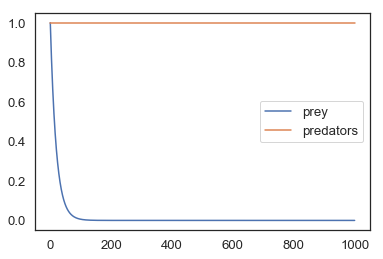

In [57]:
results.plot()

### Sweeping beta

Make a range of values for `beta`, with constant `gamma`.

In [10]:
beta_array = linspace(0.1, 1.1, 11)
gamma = 0.25

Run the simulation once for each value of `beta` and print total infections.

In [11]:
for beta in beta_array:
    system = make_system(beta, gamma)
    results = run_simulation(system, update_func)
    print(system.beta, calc_total_infected(results))

Wrap that loop in a function and return a `SweepSeries` object.

In [12]:
def sweep_beta(beta_array, gamma):
    """Sweep a range of values for beta.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[system.beta] = calc_total_infected(results)
    return sweep

Sweep `beta` and plot the results.

In [13]:
infected_sweep = sweep_beta(beta_array, gamma)

In [14]:
label = 'gamma = ' + str(gamma)
plot(infected_sweep, label=label)

decorate(xlabel='Contacts per day (beta)',
         ylabel='Fraction infected')

savefig('figs/chap06-fig01.pdf')

### Sweeping gamma

Using the same array of values for `beta`

In [15]:
beta_array

And now an array of values for `gamma`

In [16]:
gamma_array = [0.2, 0.4, 0.6, 0.8]

For each value of `gamma`, sweep `beta` and plot the results.

In [17]:
for gamma in gamma_array:
    infected_sweep = sweep_beta(beta_array, gamma)
    label = 'γ = ' + str(gamma)
    plot(infected_sweep, label=label)
    
decorate(xlabel='Contacts per day (beta)',
         ylabel='Fraction infected',
         loc='upper left')

savefig('figs/chap06-fig02.pdf')

** Exercise:**  Suppose the infectious period for the Freshman Plague is known to be 2 days on average, and suppose during one particularly bad year, 40% of the class is infected at some point.  Estimate the time between contacts.

In [18]:
# Solution goes here

In [19]:
# Solution goes here

In [20]:
# Solution goes here